In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots


In [2]:
# Online Retail.xlsx

In [3]:
!pip install openpyxl

In [4]:
df = pd.read_excel("Online Retail.xlsx")

In [5]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [6]:
df.isna().sum() / df.shape[0] 

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [7]:
df.isna().sum()
df = df.dropna()

In [8]:
df # Its about 14k rows drops
   # maybe later i will see how i can handle them but now its good to my pc to drop them 

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[406829 rows x 8 columns]

In [9]:
for col in df.columns:
    print(f"Number of unique values in column {col} is : {df[col].nunique()}")

Number of unique values in column InvoiceNo is : 22190
Number of unique values in column StockCode is : 3684
Number of unique values in column Description is : 3896
Number of unique values in column Quantity is : 436
Number of unique values in column InvoiceDate is : 20460
Number of unique values in column UnitPrice is : 620
Number of unique values in column CustomerID is : 4372
Number of unique values in column Country is : 37


In [10]:
# we have 37 country in this dataset 
# we have 4372 customer 

In [11]:
from tools import drop_Outliers

In [12]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
numerical_cols = ["UnitPrice" , "Quantity"]

In [14]:
def Muti_box_plot(df , columns):
    
    rows = 1
    cols = 2
    fig = make_subplots(rows=rows, cols=cols , subplot_titles = [col.title() for col in columns])
    
    for i , column in enumerate(columns):
        row = 1
        col = (i)%cols + 1
        
        fig.add_trace(
        go.Box(x = df[column] ,
        # histnorm='percent',
        showlegend=False,
        name=column.title(),

        opacity=0.75
    ),
        row=row, col=col
        
    )
    
    
    
        fig.update_layout(plot_bgcolor = "white",
                 font = dict(color = "#909497", size = 18),
                 title = dict(text = "all numerical columns".title(), font = dict(size = 26)),
                 margin = dict(t = 100, r = 80, b = 80, l = 120),
                 hovermode="closest",
                 height = 1000,
                 width = 900)
        
    fig.show() 


In [15]:
# show outliers 
# Muti_box_plot(df , numerical_cols)

In [16]:
selected_columns = [col for col in df if df[col].dtype in ["int64" , "float64"]]
selected_columns

['Quantity', 'UnitPrice', 'CustomerID']

In [17]:
# df_without_outliers = df.copy()
# for col in numerical_cols:
#     df_without_outliers[col] = drop_Outliers(df_without_outliers , col)

In [18]:
# drop outliers 

In [19]:
for col in numerical_cols:
    df[col] = drop_Outliers(df , col)

/tmp/ipykernel_11358/1731234422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = drop_Outliers(df , col)
/tmp/ipykernel_11358/1731234422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = drop_Outliers(df , col)


In [20]:
df.isna().sum() / df.shape[0] 

InvoiceNo      0.000000
StockCode      0.000000
Description    0.000000
Quantity       0.065585
InvoiceDate    0.000000
UnitPrice      0.088615
CustomerID     0.000000
Country        0.000000
dtype: float64

In [21]:
df = df.dropna()

In [22]:
df = df.reset_index(drop = True )
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
344388    581587     22613          PACK OF 20 SPACEBOY NAPKINS      12.0   
344389    581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
344390    581587     23254        CHILDRENS CUTLERY DOLLY GIRL        4.0   
344391    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
344392    581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
344388 2011-12-09 12:50:00       0.85     12680.0          France  
344389 2011-12-09 12:50:00       2.10     12680.0          France  
344390 2011-12-09 12:50:00       4.15     12680.0          France  
344391 2011-12-09 12:50:00       4.15     12680.0          France  
344392 2011-12-09 12:50:00       4.95     12680.0          France  

[344393 rows x 8 columns]

In [23]:
# After drop the outliers 
for col in df.columns:
    print(f"Number of unique values in column {col} is : {df[col].nunique()}")

Number of unique values in column InvoiceNo is : 19480
Number of unique values in column StockCode is : 3415
Number of unique values in column Description is : 3598
Number of unique values in column Quantity is : 40
Number of unique values in column InvoiceDate is : 18142
Number of unique values in column UnitPrice is : 220
Number of unique values in column CustomerID is : 4222
Number of unique values in column Country is : 37


#### Distribution of Country 

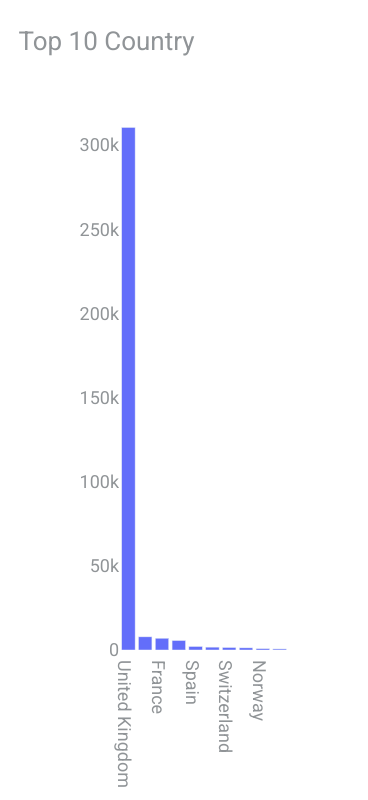

In [24]:
import plotly.graph_objects as go

y = df.Country.value_counts()[:10]
x = df.Country.value_counts().index[:10]

# Create a bar plot
fig = go.Figure(data=go.Bar(x=x, y=y))

# Customize the layout
fig.update_layout(plot_bgcolor = "white",
              font = dict(color = "#909497", size = 18),
              title = dict(text = "Top 10 Country", 
              font = dict(size = 26)),
              margin = dict(t = 100, r = 80, b = 80, l = 120),
              hovermode="closest",
              height = 800,
              width = 800)


# Show the plot
fig.show()

* ok United Kingdom has the higher trade activity 

#### Distribution of CustomerID 

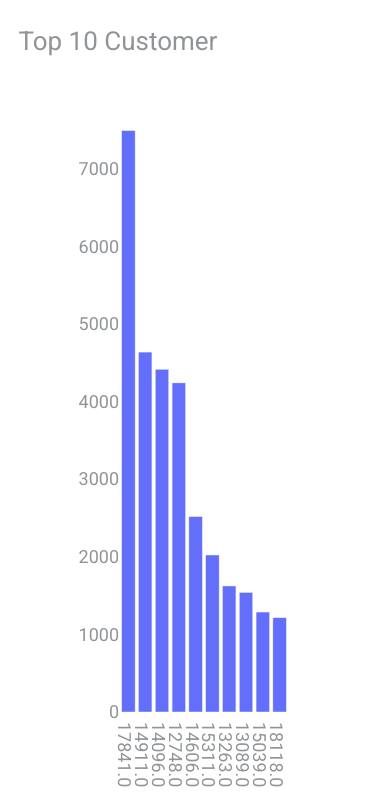

In [25]:
import plotly.graph_objects as go

y = df.CustomerID.value_counts().values[:10]
x = df.CustomerID.value_counts().index[:10].astype(str)

# Create a bar plot
fig = go.Figure(data=go.Bar(x=x, y=y))

# Customize the layout
fig.update_layout(plot_bgcolor = "white",
              font = dict(color = "#909497", size = 18),
              title = dict(text = "Top 10 Customer", 
              font = dict(size = 26)),
              margin = dict(t = 100, r = 80, b = 80, l = 120),
              xaxis = dict(tickvals = df.CustomerID.value_counts().index[:10].astype(str)),
              hovermode="closest",
              height = 800,
              width = 800)


# Show the plot
fig.show()

* Based on the dataset, it is evident that customer ID 17841 has significantly higher trade activity.

### Feature Engineering 

In [26]:
df["Total Price"] = df.Quantity * df.UnitPrice 

#### Correlation plot 

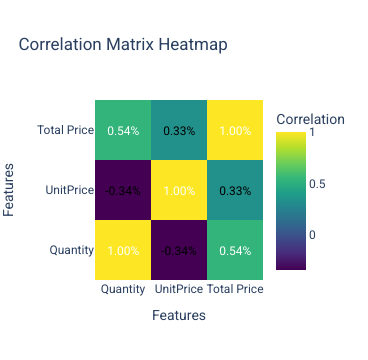

In [27]:
import plotly.graph_objects as go

# Select numerical columns excluding 'CustomerID' and compute the correlation matrix
correlation_matrix = df.select_dtypes(include=["int64", "float64"]).drop(columns="CustomerID").corr()

# Extract column names for labeling
column_names = correlation_matrix.columns

# Create annotations for the heatmap with percentages
annotations = []
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        percentage = correlation_matrix.values[i, j]
        annotations.append(
            go.layout.Annotation(
                text=f'{percentage:.2f}%',
                x=j,
                y=i,
                xref='x1',
                yref='y1',
                showarrow=False,
                font=dict(color='black' if percentage < 0.5 else 'white')
            )
        )

# Create a heatmap figure using Plotly
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix,
        x=column_names,  # Set x-axis labels
        y=column_names,  # Set y-axis labels
        colorscale='Viridis',  # Optional: Choose a color scale for better visualization
        colorbar=dict(title="Correlation")  # Optional: Add a title to the color bar
    )
)

# Set the title and axis labels for better context
fig.update_layout(
    title="Correlation Matrix Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    annotations=annotations
    
)

# Display the heatmap
fig.show()

* as we see if the quantity increasing the unit price get low but the total price get increase 
* and the total price is increase by unit price too 

* and that cause total price = Quantity * unit price 

#### Create a 4 columns for Year , Month , Day , Time 

In [28]:
df["Year"] = pd.to_datetime(df.InvoiceDate).dt.year
df["Month"] = pd.to_datetime(df.InvoiceDate).dt.month 
df["Day"] = pd.to_datetime(df.InvoiceDate).dt.day 
df["Time"] = pd.to_datetime(df.InvoiceDate).dt.time

#### Create a column for night and day 

In [29]:
df['day/night'] = df['Time'].astype(str).apply(lambda x: 'night' if ('00:00:00' <= x <= '05:00:00') or ('18:00:00' <= x <= '23:00:00') else 'day')

In [30]:
df["day/night"].value_counts()


day/night
day      338068
night      6325
Name: count, dtype: int64

#### Statistics for Year VS Quantity 

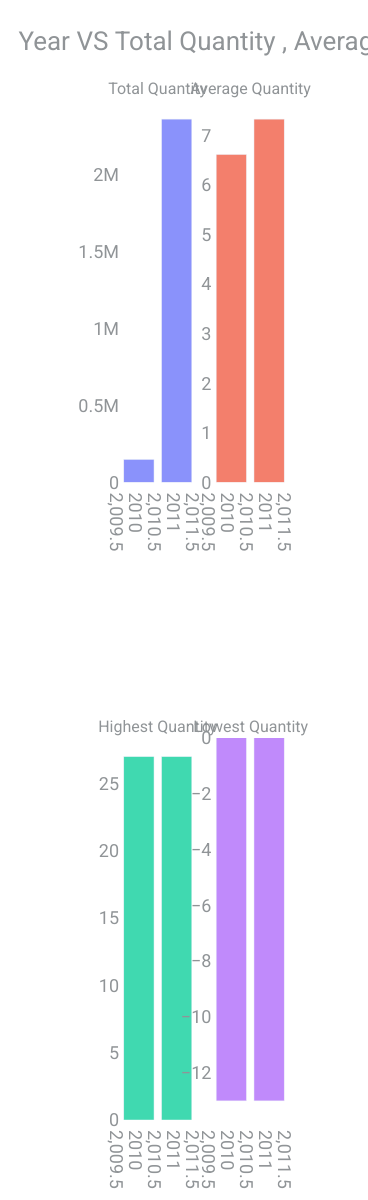

In [31]:
from tools import column_summary_statistics 
from tools import plot_column_summary_statistics 
plot_column_summary_statistics(column_summary_statistics(df , "Year" , "Quantity"))


#### what we get 
* there is a negative values in min Quantity
* that is not natural to have Quantity in negative 

#### Quick search: 
* What is negative quantity in stock?
* A negative quantity indicates a sell transaction whereas a positive quantity indicates a buy transaction.
* The shares you sold will be settled on T+2 day & the funds will be available for withdrawal then.
* However, 80% of the value of shares sold can be utilized to make additional trades.

#### What we will do 
* So right now we will apply absolute on total price column
* we will Create another columns called 
transaction type that indicates whether sell or buy transactions 
* apply abs on Quantitiy 

In [32]:
# applay absolute 
df["Total Price"] = df["Total Price"].apply(lambda x : np.abs(x))

In [33]:
# Create another column called Transaction Type 
df["Transaction Type"] = ["Buy" if i > 0 else "Sell" for i in df.Quantity ]

# Cause we Create a column for Transaction Type So we dont need a negative value to determine the trade Transaction Type 
df["Quantity"] = df["Quantity"].apply(lambda x : np.abs(x))

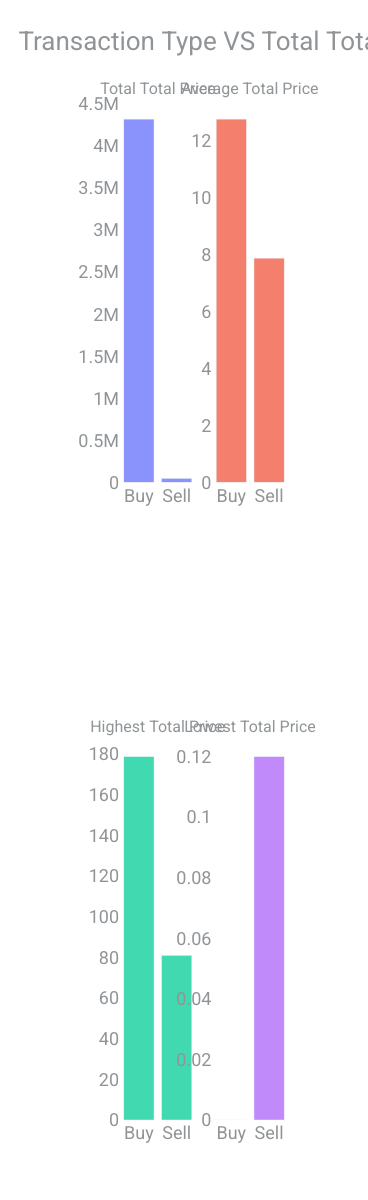

In [34]:
# Plot a statistical plot for Transformation Type and Total Price
plot_column_summary_statistics(column_summary_statistics(df , "Transaction Type" , "Total Price"))

* idk why the lowest price of buy is not shown 
* or maybe cous the lowest price is 0 

### preprocessing 

In [35]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
344388    581587     22613          PACK OF 20 SPACEBOY NAPKINS      12.0   
344389    581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
344390    581587     23254        CHILDRENS CUTLERY DOLLY GIRL        4.0   
344391    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
344392    581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
344388 2011-12-09 12:50:00       0.85     12680.0          France   
344389 2011-12-09 12:50:00       2.10     12680.0          France   
344390 2011-12-09 12:50:00       4.15     12680.0          France   
344391 2011-12-09 12:50:00       4.15     12680.0          France   
344392 2011-12-09 12:50:00       4.95     12680.0          France   

        Total Price  Year  Month  Day      Time day/night Transaction Type  
0             15.30  2010     12    1  08:26:00       day              Buy  
1             20.34  2010     12    1  08:26:00       day              Buy  
2             22.00  2010     12    1  08:26:00       day              Buy  
3             20.34  2010     12    1  08:26:00       day              Buy  
4             20.34  2010     12    1  08:26:00       day              Buy  
...             ...   ...    ...  ...       ...       ...              ...  
344388        10.20  2011     12    9  12:50:00       day              Buy  
344389        12.60  2011     12    9  12:50:00       day              Buy  
344390        16.60  2011     12    9  12:50:00       day              Buy  
344391        16.60  2011     12    9  12:50:00       day              Buy  
344392        14.85  2011     12    9  12:50:00       day              Buy  

[344393 rows x 15 columns]

In [36]:
Data = df.copy()

In [37]:
# Encode Time column
Data.Time = Data.Time.astype(str).apply(lambda x : int(x.split(":")[0])) # Take only Hours

In [38]:
# Drop unwanted columns 
Data = Data.drop(["InvoiceNo" , "StockCode" , "Description" ,"InvoiceDate" , "CustomerID"] , axis = 1) 

In [39]:
# Encoding columns 
Data["Transaction Type"] = Data["Transaction Type"].replace({k : i for i , k in enumerate(Data["Transaction Type"].unique())}) 
Data["day/night"] = Data["day/night"].replace({k : i for i , k in enumerate(Data["day/night"].unique())})

In [40]:
# Encode all the rest columns : Note its only the `Country` column cause its the only catigorical column left 
Data = pd.get_dummies(Data)

In [41]:
# Drop the last column cause when its all false that mean its True so we dont need it 
Data = Data.drop("Country_Unspecified" , axis = 1)

### Dimensionality Reduction 

In [42]:
from sklearn.decomposition import PCA 

In [74]:
dim_red = PCA()  

In [75]:
new_data = dim_red.fit_transform(Data)

In [76]:
new_data.shape

(344393, 46)

In [77]:
columns = dim_red.get_feature_names_out()

In [78]:
dim_red.explained_variance_ratio_.round(3)

array([0.595, 0.24 , 0.101, 0.036, 0.016, 0.007, 0.004, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [79]:
import seaborn as sns 

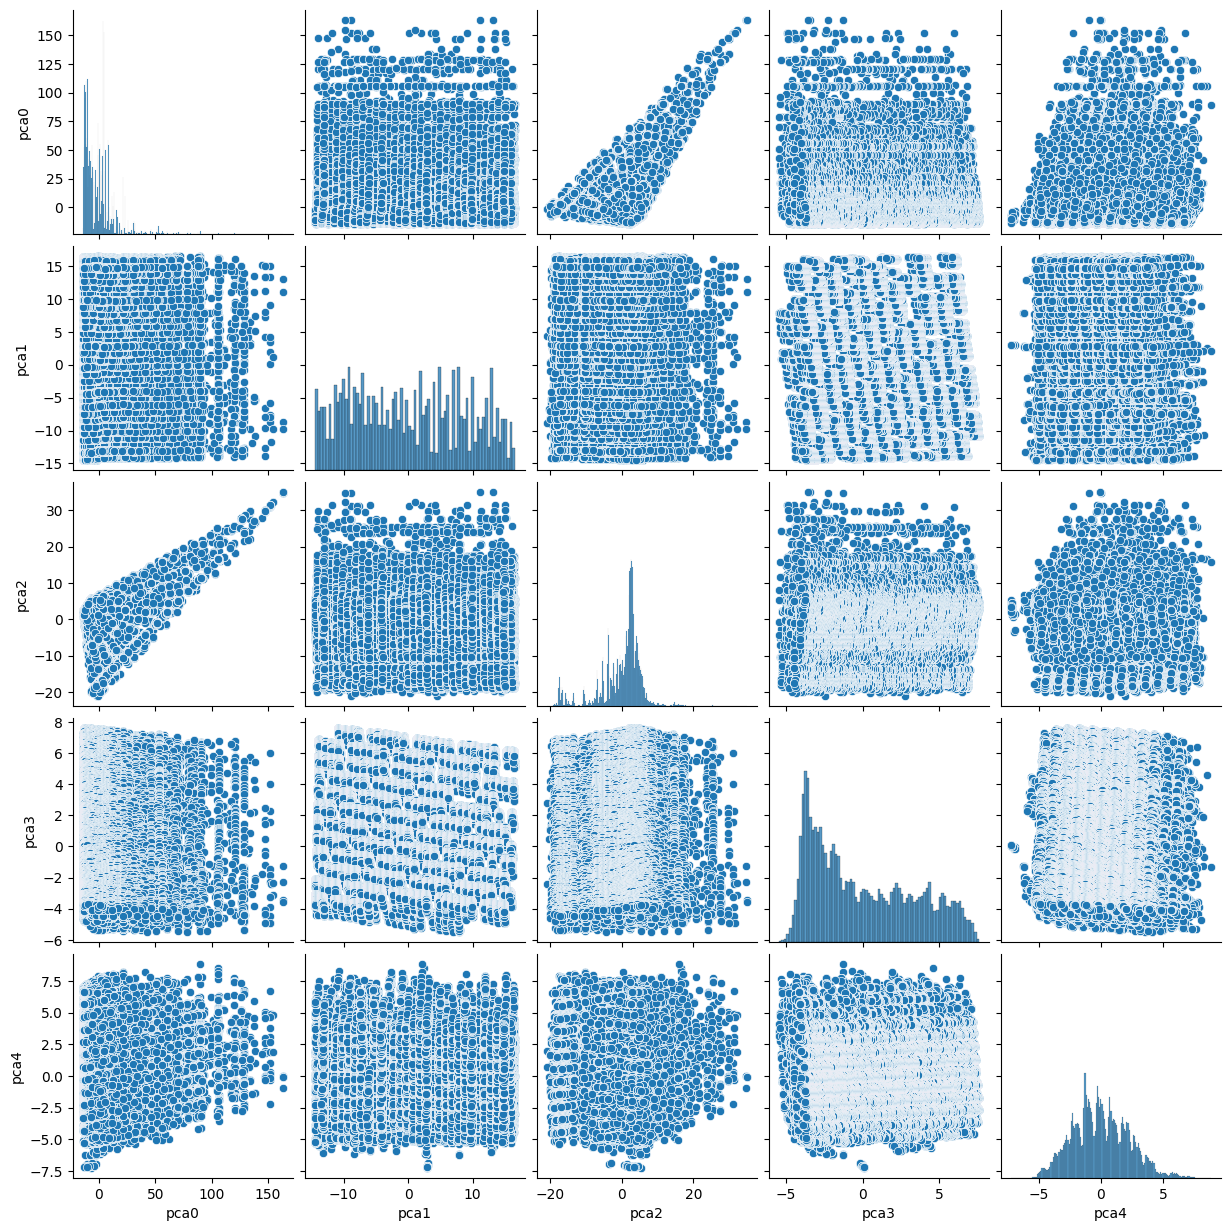

In [80]:
# PairPlot for first 2 columns 
sns.pairplot(pd.DataFrame(new_data[: , :5] , columns = columns[:5]))

In [82]:
# So as we see in explained_variance_ratio_ we will take only the first two columns 
new_data = new_data[: , :5]
new_data.shape

(344393, 5)

let try using Kmeans with k = 2 

In [81]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [83]:
kmeanModel = KMeans(2)

In [84]:
kmeanModel.fit(new_data)

KMeans(n_clusters=2)

In [85]:
predict = kmeanModel.predict(new_data)

<Axes: >

/home/aboud/miniforge3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/home/aboud/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



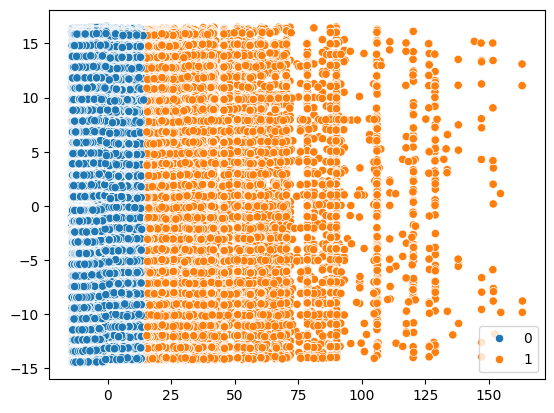

In [86]:
sns.scatterplot(x = new_data[:,0] ,y = new_data[:,1] , hue = predict)

In [56]:
kmeanModel.inertia_

55933772.545651644

#### We will try Elbow method 
* for more information : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [87]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(new_data)
    kmeanModel.fit(new_data)
 
    distortions.append(sum(np.min(cdist(new_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / new_data.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(new_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / new_data.shape[0]
    mapping2[k] = kmeanModel.inertia_


#### plot elbow method using the different values of Distortion

In [88]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 15.051374932037117
2 : 13.36714523883024
3 : 11.273226181882027
4 : 10.05855151333757
5 : 9.394722071689598
6 : 8.49708215280313
7 : 8.04649372727483
8 : 7.933391011269151
9 : 7.579353907527887


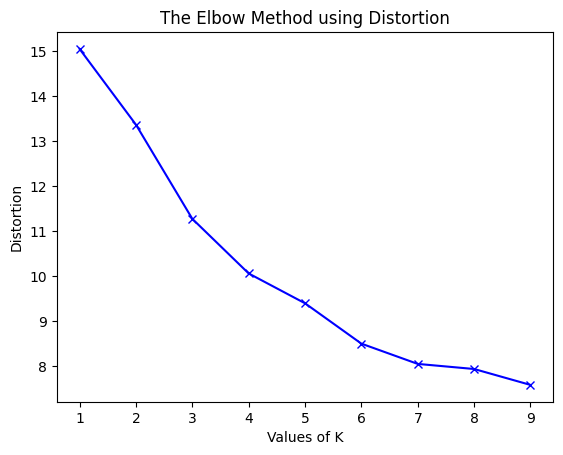

In [89]:
import matplotlib.pyplot as plt 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


#### plot elbow method using the different values of Inertia

In [91]:
for key, val in mapping2.items():
    print(f'{key} : {val}')


1 : 107119702.20031002
2 : 72565477.82389969
3 : 54465132.0562874
4 : 42309485.228574775
5 : 36050900.237156056
6 : 30215393.526085682
7 : 26695461.45935101
8 : 24837448.051318407
9 : 23116021.323330116


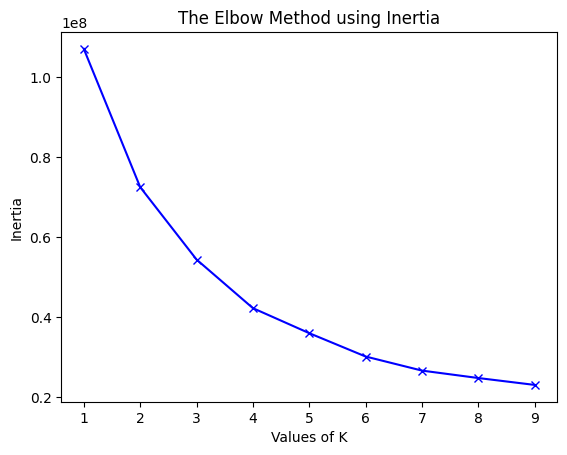

In [92]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


* Ok we will choose k = 5 as i see its the best hayper parameter for k 

In [95]:
km = KMeans(5)
km.fit(new_data)
predict = km.predict(new_data)

<Axes: >

/home/aboud/miniforge3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/home/aboud/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



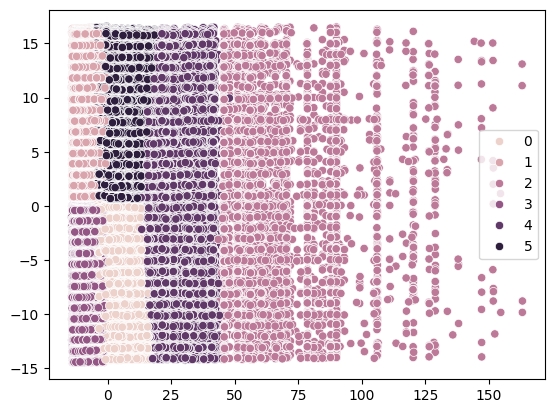

In [96]:
sns.scatterplot(x = new_data[:,0] ,y = new_data[:,1] , hue = predict)

#### ok we got a nice plot for pca with classes 

<Axes: xlabel='Quantity', ylabel='Total Price'>

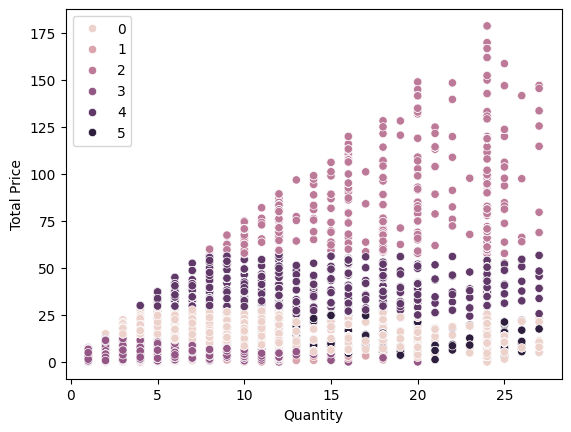

In [97]:
sns.scatterplot(x = df.Quantity , y = df["Total Price"] , hue= predict)

In [65]:
Data["Class"] = predict 
df["Class"] = predict 

In [66]:
# To add new col to numpy array 
# data = np.append(new_data, predict.reshape(-1,1), 1)

<Axes: xlabel='Class'>

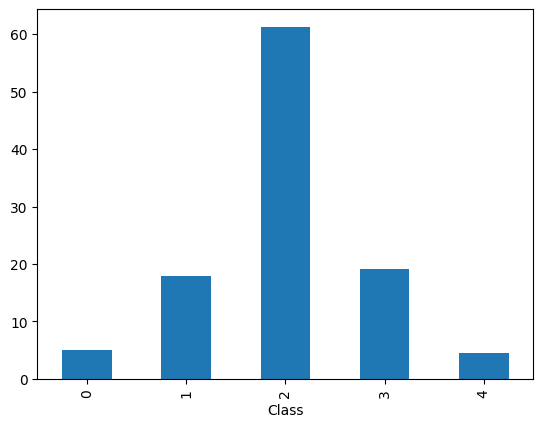

In [67]:
df.groupby("Class")["Total Price"].mean().plot(kind = "bar")

* its look like normal distrbution
* class 2 has a high avarage total price
* 0 , 4 classes has a lowest avarage price
* 1 , 2 has mid avarage price 

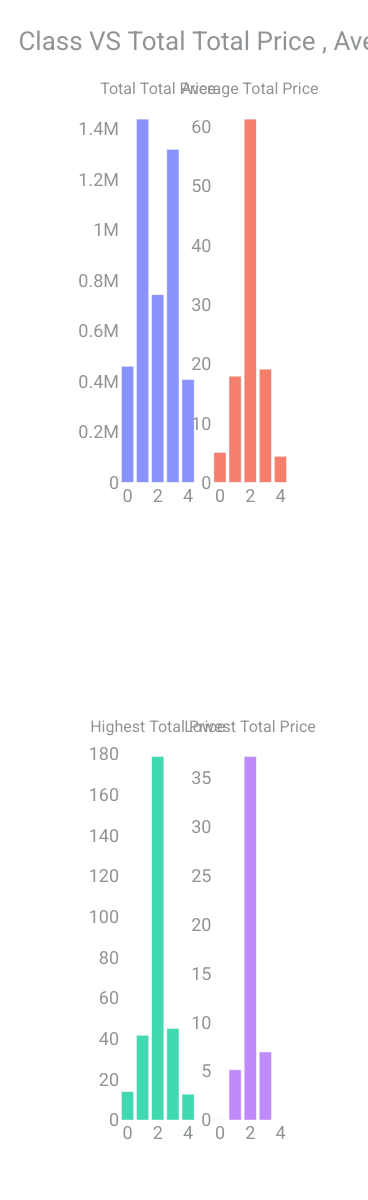

In [68]:
from tools import column_summary_statistics 
from tools import plot_column_summary_statistics 
plot_column_summary_statistics(column_summary_statistics(df , "Class" , "Total Price"))


Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Total Price, Year, Month, Day, Time, day/night, Transaction Type, Class]
Index: []

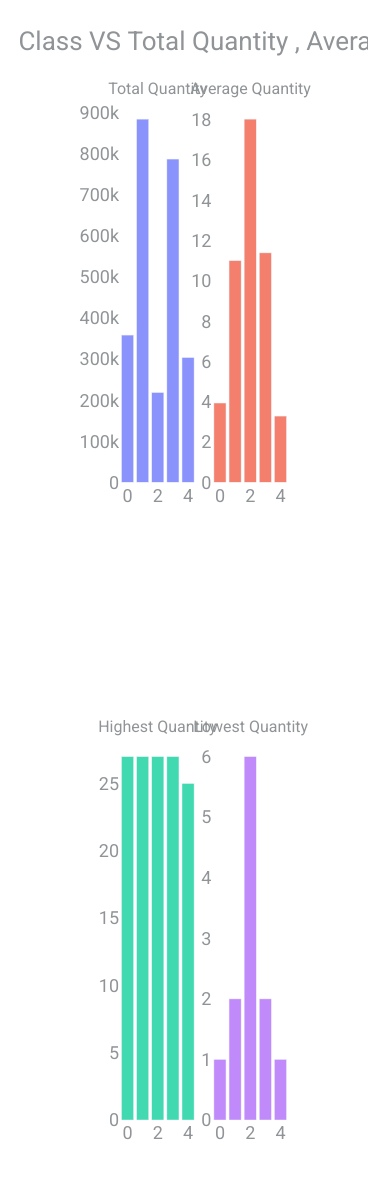

In [70]:
plot_column_summary_statistics(column_summary_statistics(df , "Class" , "Quantity"))
